## Module 3. Analyze Networks

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

Data resources: http://networksciencebook.com/translations/en/resources/data.html

### 1. Social Networks - Facebook Pages
using ***Graph Embedding with Self Clustering: Facebook data*** 

- data location: SNAP (Stanford Large Network Dataset Collection)
- source: B. Rozemberczki, R. Davies, R. Sarkar and C. Sutton. GEMSEC: Graph Embedding with Self Clustering. 2018.

<img src="../images/data.png" alt="Data" style="width: 300px;"/>

* nodes: pages
* edges: mutual likes among them -> this means undirected & networks


There are 8 different networks representing different categories. For our current analysis, we will analyze and compare 4 networks `Company`, `Artist`, `Politician` and `Public Figure`, however, you can play with all of them to get used to manipulating networks and computing structural property measures, and to gain insights about the data.

In [2]:
# load edgelists from data file
co_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/company_edges.csv", delimiter=',')
art_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/artist_edges.csv", delimiter=',')
poli_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/politician_edges.csv", delimiter=',')
pub_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/public_figure_edges.csv", delimiter=',')

In [3]:
# check number of nodes and edges 
N = len(poli_net.nodes)
print(N)

E = len(co_net.edges)
print(E)

5908
52310


#### 1. Node degree, network average degree, degree distribution

In [4]:
# get degrees
degrees = [deg for node, deg in nx.degree(poli_net)]

In [5]:
# kmin - minimum degree
kmin = np.min(degrees)
print("Minimum degree: ", kmin)

# kmax - maximum degree
kmax = np.max(degrees)
print("Maximum degree: ", kmax)

# kavg - average degree of the network
kavg = np.mean(degrees)
print("Average degree: ", kavg)

Minimum degree:  1
Maximum degree:  323
Average degree:  14.126269465132024


**Degree distribution**: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [6]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

In [7]:
dd = degree_distr(poli_net)

Text(0.5,1,'Physicians')

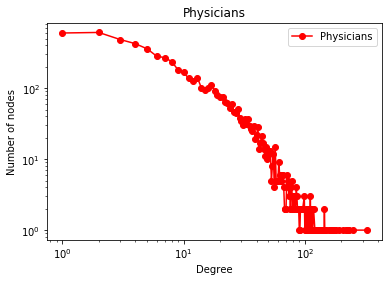

In [8]:
plt.figure()
plt.loglog(dd.T[0],dd.T[1],'ro-')
plt.legend(['Physicians'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Physicians')

In [9]:
# calculate average degree of politician pages
degrees = [deg for node, deg in nx.degree(poli_net)]
kavg = np.mean(degrees)
print("The # of mutual likes politician pages have on average:", kavg)

# calculate average degree of artist pages
degrees = [deg for node, deg in nx.degree(art_net)]
kavg = np.mean(degrees)
print("The # of mutual likes artist pages have on average:", kavg)

# calculate average degree of company pages
degrees = [deg for node, deg in nx.degree(co_net)]
kavg = np.mean(degrees)
print("The # of mutual likes company pages have on average:", kavg)

# calculate average degree of public figure pages
degrees = [deg for node, deg in nx.degree(pub_net)]
kavg = np.mean(degrees)
print("The # of mutual likes public figure pages have on average:", kavg)

The # of mutual likes politician pages have on average: 14.126269465132024
The # of mutual likes artist pages have on average: 32.43812728892408
The # of mutual likes company pages have on average: 7.413023453553461
The # of mutual likes public figure pages have on average: 11.606398616515348


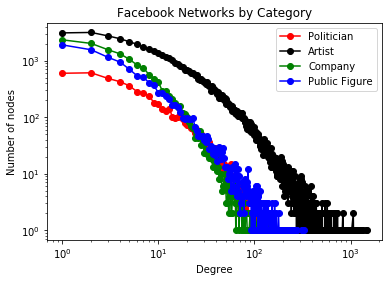

In [10]:
hist_poli = degree_distr(poli_net)
hist_art = degree_distr(art_net)
hist_co = degree_distr(co_net)
hist_pub = degree_distr(pub_net)

plt.figure()
plt.loglog(hist_poli.T[0],hist_poli.T[1],'ro-')
plt.loglog(hist_art.T[0],hist_art.T[1],'ko-')
plt.loglog(hist_co.T[0],hist_co.T[1],'go-')
plt.loglog(hist_pub.T[0],hist_pub.T[1],'bo-')
plt.legend(['Politician', 'Artist', 'Company', 'Public Figure'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Networks by Category')
plt.savefig('fb_network_degree_distr.png')

#### 2. Paths on networks: average path length, shortest path, longest path

In [11]:
# load physicians network
G = nx.read_edgelist("../datafiles/social/physicians/out.moreno_innovation_innovation", comments='%')

In [12]:
# load Zachary karate club network
Z = nx.karate_club_graph()

In [13]:
# find shortest path between node1 and node2 in directed & undirected networks 
nx.shortest_path(G, '1', '15')

['1', '2', '40', '15']

In [14]:
# average path length in graph
nx.average_shortest_path_length(Z, weight=None)

2.408199643493761

#### 3. Clustering coefficient, triangles

In [15]:
# triangles
nx.triangles(G)

{'1': 3,
 '10': 10,
 '100': 6,
 '101': 6,
 '102': 3,
 '103': 4,
 '104': 0,
 '105': 0,
 '106': 1,
 '107': 2,
 '108': 1,
 '109': 7,
 '11': 16,
 '110': 2,
 '111': 3,
 '112': 2,
 '113': 0,
 '114': 0,
 '115': 3,
 '116': 2,
 '117': 6,
 '118': 3,
 '119': 7,
 '12': 17,
 '120': 8,
 '121': 45,
 '122': 1,
 '123': 4,
 '124': 4,
 '125': 12,
 '126': 10,
 '127': 73,
 '128': 35,
 '129': 20,
 '13': 25,
 '130': 8,
 '131': 9,
 '132': 25,
 '133': 13,
 '134': 8,
 '135': 1,
 '136': 9,
 '137': 2,
 '138': 14,
 '139': 0,
 '14': 13,
 '140': 4,
 '141': 14,
 '142': 8,
 '143': 1,
 '144': 13,
 '145': 7,
 '146': 2,
 '147': 1,
 '148': 7,
 '149': 8,
 '15': 43,
 '150': 6,
 '151': 11,
 '152': 6,
 '153': 3,
 '154': 3,
 '155': 6,
 '156': 8,
 '157': 8,
 '158': 10,
 '159': 3,
 '16': 19,
 '160': 7,
 '161': 9,
 '162': 6,
 '163': 5,
 '164': 1,
 '165': 0,
 '166': 7,
 '167': 7,
 '168': 15,
 '169': 5,
 '17': 11,
 '170': 13,
 '171': 10,
 '172': 2,
 '173': 5,
 '174': 4,
 '175': 4,
 '176': 4,
 '177': 2,
 '178': 1,
 '179': 8,
 '18': 

In [16]:
# clustering coefficient of a node
nx.clustering(G, '1')

0.14285714285714285

In [17]:
# clustering coefficient of all nodes (returns a dictionary)
nx.clustering(G)

{'1': 0.14285714285714285,
 '10': 0.09523809523809523,
 '100': 0.21428571428571427,
 '101': 0.21428571428571427,
 '102': 0.14285714285714285,
 '103': 0.19047619047619047,
 '104': 0,
 '105': 0,
 '106': 0.1,
 '107': 0.3333333333333333,
 '108': 0.1,
 '109': 0.25,
 '11': 0.13333333333333333,
 '110': 0.6666666666666666,
 '111': 0.5,
 '112': 0.2,
 '113': 0,
 '114': 0,
 '115': 1.0,
 '116': 0.3333333333333333,
 '117': 1.0,
 '118': 0.2,
 '119': 0.25,
 '12': 0.14166666666666666,
 '120': 0.38095238095238093,
 '121': 0.19480519480519481,
 '122': 1.0,
 '123': 0.4,
 '124': 0.6666666666666666,
 '125': 0.3333333333333333,
 '126': 0.2777777777777778,
 '127': 0.1931216931216931,
 '128': 0.22875816993464052,
 '129': 0.4444444444444444,
 '13': 0.23809523809523808,
 '130': 0.5333333333333333,
 '131': 0.32142857142857145,
 '132': 0.3787878787878788,
 '133': 0.28888888888888886,
 '134': 0.38095238095238093,
 '135': 0.3333333333333333,
 '136': 0.25,
 '137': 0.09523809523809523,
 '138': 0.3888888888888889,
 '1

In [18]:
# clustering coefficient of the network
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print("Physicians network clustering coefficient:", avg_clust)

Physicians network clustering coefficient: 0.31157513564640726


#### 4. Centrality measures

In [19]:
# degree centrality
nx.degree_centrality(G)

{'1': 0.029166666666666667,
 '10': 0.0625,
 '100': 0.03333333333333333,
 '101': 0.03333333333333333,
 '102': 0.029166666666666667,
 '103': 0.029166666666666667,
 '104': 0.020833333333333332,
 '105': 0.016666666666666666,
 '106': 0.020833333333333332,
 '107': 0.016666666666666666,
 '108': 0.020833333333333332,
 '109': 0.03333333333333333,
 '11': 0.06666666666666667,
 '110': 0.0125,
 '111': 0.016666666666666666,
 '112': 0.020833333333333332,
 '113': 0.0125,
 '114': 0.008333333333333333,
 '115': 0.0125,
 '116': 0.016666666666666666,
 '117': 0.016666666666666666,
 '118': 0.025,
 '119': 0.03333333333333333,
 '12': 0.06666666666666667,
 '120': 0.029166666666666667,
 '121': 0.09166666666666666,
 '122': 0.008333333333333333,
 '123': 0.020833333333333332,
 '124': 0.016666666666666666,
 '125': 0.0375,
 '126': 0.0375,
 '127': 0.11666666666666667,
 '128': 0.075,
 '129': 0.041666666666666664,
 '13': 0.0625,
 '130': 0.025,
 '131': 0.03333333333333333,
 '132': 0.05,
 '133': 0.041666666666666664,
 '13

In [20]:
# betweenness centrality of network
nx.betweenness_centrality(G)

{'1': 0.0026307234207896724,
 '10': 0.008055352049537088,
 '100': 0.001867867917999953,
 '101': 0.0029317408908966633,
 '102': 0.0036667216896366555,
 '103': 0.0017107482560232597,
 '104': 0.0020254880008033767,
 '105': 0.0005166946495372256,
 '106': 0.0007712708919282741,
 '107': 0.0002878104099336899,
 '108': 0.0015175553588245238,
 '109': 0.0021842522852631753,
 '11': 0.010669466112042881,
 '110': 0.00011652485875965572,
 '111': 0.00027268128667157324,
 '112': 0.0008422660705894743,
 '113': 0.00038615527534300285,
 '114': 7.219787031502511e-05,
 '115': 0.0,
 '116': 0.0011729272418739404,
 '117': 0.0,
 '118': 0.0007803170713322663,
 '119': 0.0008026220283011349,
 '12': 0.009360851029818543,
 '120': 0.0006490817502984428,
 '121': 0.006821751523488637,
 '122': 0.0,
 '123': 8.733605229421128e-05,
 '124': 2.079723314032937e-05,
 '125': 0.0015145240124352002,
 '126': 0.0010689162201121861,
 '127': 0.00981490264478917,
 '128': 0.0046173179448436245,
 '129': 0.00045228462069466245,
 '13': 0

In [21]:
# closeness centrality of network
nx.closeness_centrality(G)

{'1': 0.17855626326963905,
 '10': 0.20765432098765432,
 '100': 0.19400230680507496,
 '101': 0.19741784037558685,
 '102': 0.19200913242009132,
 '103': 0.18565121412803534,
 '104': 0.181445523193096,
 '105': 0.18027867095391212,
 '106': 0.18382513661202185,
 '107': 0.16636993076162215,
 '108': 0.18941441441441442,
 '109': 0.19333333333333336,
 '11': 0.22337317397078352,
 '110': 0.15574074074074076,
 '111': 0.1797008547008547,
 '112': 0.16636993076162215,
 '113': 0.16938569989929508,
 '114': 0.15318761384335156,
 '115': 0.17520833333333333,
 '116': 0.17742616033755276,
 '117': 0.14991087344028522,
 '118': 0.08683176100628931,
 '119': 0.0989695340501792,
 '12': 0.22248677248677248,
 '120': 0.09791666666666667,
 '121': 0.12608447488584476,
 '122': 0.06817901234567901,
 '123': 0.0730489417989418,
 '124': 0.07190755208333333,
 '125': 0.0989695340501792,
 '126': 0.09113036303630363,
 '127': 0.13945707070707072,
 '128': 0.11650843881856539,
 '129': 0.10114468864468866,
 '13': 0.2076543209876543

#### 5. Components

In [22]:
# checks whether the network is connected
nx.is_connected(G)

False

In [23]:
# find number of connected components
nx.number_connected_components(G)

4

In [24]:
# get the nodes in the same component as *n*
nx.node_connected_component(G, '1')

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99'}

#### 6. Assortativity

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

Assortativity computed based on:
* degree
* attribute

In [25]:
# check assortativity of network
nx.assortativity.degree_pearson_correlation_coefficient(G)

-0.05582911431431812

In [26]:
nx.degree_assortativity_coefficient(G)

-0.05582911431431909

In [27]:
# check assortativity (mixing) by a particular attribute
#nx.attribute_assortativity_coefficient(G, attribute)

In [28]:
# we can check assortativity
print("Politician network assortativity: {}".format(nx.degree_assortativity_coefficient(poli_net)))
print("Artist network assortativity: {}".format(nx.degree_assortativity_coefficient(art_net)))
print("Company network assortativity: {}".format(nx.degree_assortativity_coefficient(co_net)))
print("Public figure network assortativity: {}".format(nx.degree_assortativity_coefficient(pub_net)))

Politician network assortativity: 0.0182443427670884
Artist network assortativity: -0.01906626068251133
Company network assortativity: 0.012977786248196819
Public figure network assortativity: 0.202161548290631


### Takeaways

* politician network has highest clustering coefficient (CC = 0.39) -> political views tend to cluster people more densely
* public figure network has the highest assortativity -> the only network that reflects human relationship type of connectivity
* disassortativity seen only in artist networks may be indicative of competitiveness, desire not to like/promote other popular peers
* lowest average degree found in company network
* highest average degree seen in artist network
* each network has similar degree distribution with heavy tail -> most nodes have small number of connections, while a few nodes (hubs) have significantly higher number of links
* and many more insights with more detailed analyses -> it is your homework to explore more! :)